<a href="https://colab.research.google.com/github/emilyfunkhouser/CIS1051FinalProject/blob/main/StockPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install TFANN

  Created wheel for TFANN: filename=TFANN-1.0.1-cp37-none-any.whl size=7539 sha256=19f3f3acba32899f48d1899ea2c1f6a0f13dede360542c1fa05614ed0ba80fd9
  Stored in directory: /root/.cache/pip/wheels/3b/38/aa/a57c9b8bdeccf63d4a14ced9ab09a1b4cc4cb3b48fadecf906
Successfully built TFANN


In [2]:
from google.colab import files
files.upload()

Saving AMZN.csv to AMZN.csv
Saving FB.csv to FB.csv
Saving GOOG.csv to GOOG.csv
Saving MSFT.csv to MSFT.csv
Saving AAPL.csv to AAPL.csv


{'AAPL.csv': b'Date,Date Value,Open,High,Low,Close,Adj Close,Volume\r\n4/26/16,42486,25.977501,26.325001,25.977501,26.0875,24.264212,224064800\r\n4/27/16,42487,24,24.6775,23.92,24.455,22.745811,458408400\r\n4/28/16,42488,24.4025,24.469999,23.5625,23.7075,22.050558,328970800\r\n4/29/16,42489,23.497499,23.68,23.127501,23.434999,21.7971,274126000\r\n5/2/16,42492,23.4925,23.52,23.1,23.41,21.773848,192640400\r\n5/3/16,42493,23.549999,23.934999,23.42,23.795,22.131937,227325200\r\n5/4/16,42494,23.799999,23.975,23.455,23.547501,21.901741,164102000\r\n5/5/16,42495,23.5,23.5175,23.17,23.309999,21.81284,143562000\r\n5/6/16,42496,23.342501,23.362499,22.9625,23.18,21.691189,174799600\r\n5/9/16,42499,23.25,23.442499,23.147499,23.1975,21.707569,131745600\r\n5/10/16,42500,23.3325,23.3925,23.0275,23.355,21.854948,134747200\r\n5/11/16,42501,23.370001,23.3925,23.115,23.127501,21.642059,114876400\r\n5/12/16,42502,23.18,23.195,22.3675,22.584999,21.134403,305258800\r\n5/13/16,42503,22.5,22.9175,22.5,22.6299

Import Data: Import/read/standardize data and create the initial plot of stock price for the given stock.

In [3]:
pip install --user install tensorflow==1.13.1


     |████████████████████████████████| 92.6MB 94kB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 368kB 48.7MB/s 
     |████████████████████████████████| 3.2MB 44.3MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Note: Make sure to restart runtime after installing tensorflow and before executing the below statements

In [1]:
#Retrieved from https://towardsdatascience.com/simple-stock-price-prediction-with-ml-in-python-learners-guide-to-ml-76896910e2ba
from TFANN import ANNR
import statistics
import xlrd

/root/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/root/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/root/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/root/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type

In [2]:
Stock = "AMZN" #@param ["AAPL", "MSFT", "AMZN", "FB", "GOOGL"]


In [3]:
import numpy as np
import matplotlib.pyplot as mpl
from sklearn.preprocessing import scale


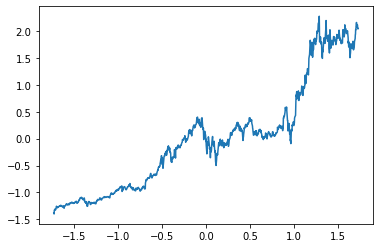

In [4]:
#Retrieved from https://towardsdatascience.com/simple-stock-price-prediction-with-ml-in-python-learners-guide-to-ml-76896910e2ba
#reads data from the file and ceates a matrix with only the dates and the prices 
xlfile = Stock + '.csv' #modified code in order to allow for prediction of multiple stocks
stock_data = np.loadtxt(xlfile, delimiter=",", skiprows=1, usecols=(1, 4))
#scales the data to smaller values
ustock_data = stock_data
stock_data=scale(stock_data)
#gets the price and dates from the matrix
uprices = ustock_data[:, 1].reshape(-1, 1)
udates = ustock_data[:, 0].reshape(-1, 1) 
prices = stock_data[:, 1].reshape(-1, 1)
dates = stock_data[:, 0].reshape(-1, 1)
#creates a plot of the data and then displays it
mpl.plot(dates[:, 0], prices[:, 0])
mpl.show()

Creating Model 1: Simple prediction model

In [5]:
#Retrieved from https://towardsdatascience.com/simple-stock-price-prediction-with-ml-in-python-learners-guide-to-ml-76896910e2ba
#Number of neurons in the input, output, and hidden layers
input = 1
output = 1
hidden = 50
#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', output)]
#construct the model and dictate params
mlpr = ANNR([input], layers, batchSize = 256, maxIter = 20000, tol = 0.2, reg = 1e-4, verbose = True)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Colocations handled automatically by placer.


In [6]:
#Retrieved from https://towardsdatascience.com/simple-stock-price-prediction-with-ml-in-python-learners-guide-to-ml-76896910e2ba
#number of days for the hold-out period used to access progress
holdDays = 5
totalDays = len(dates)
#fit the model to the data "Learning"
mlpr.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

Iter     1	      1.88177631 (Batch Size:   256)
Iter     2	      1.70400455 (Batch Size:   256)
Iter     3	      1.51384456 (Batch Size:   256)
Iter     4	      1.42102938 (Batch Size:   256)
Iter     5	      1.24331644 (Batch Size:   256)
Iter     6	      1.13233972 (Batch Size:   256)
Iter     7	      1.03485739 (Batch Size:   256)
Iter     8	      0.92893214 (Batch Size:   256)
Iter     9	      0.86986212 (Batch Size:   256)
Iter    10	      0.76104159 (Batch Size:   256)
Iter    11	      0.68007126 (Batch Size:   256)
Iter    12	      0.59032515 (Batch Size:   256)
Iter    13	      0.53814692 (Batch Size:   256)
Iter    14	      0.46790275 (Batch Size:   256)
Iter    15	      0.42132542 (Batch Size:   256)
Iter    16	      0.37710540 (Batch Size:   256)
Iter    17	      0.33065310 (Batch Size:   256)
Iter    18	      0.29251516 (Batch Size:   256)
Iter    19	      0.26259498 (Batch Size:   256)
Iter    20	      0.24060941 (Batch Size:   256)
Iter    21	      0.20821910 (Batch Size:

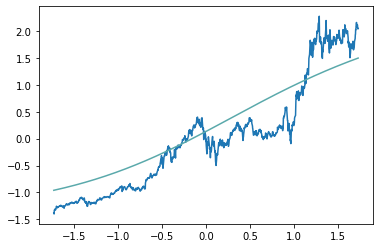

In [7]:
#Retrieved from https://towardsdatascience.com/simple-stock-price-prediction-with-ml-in-python-learners-guide-to-ml-76896910e2ba
#Predict the stock price using the model
pricePredict = mlpr.predict(dates)
#Display the predicted reuslts agains the actual data
mpl.plot(dates, prices)
mpl.plot(dates, pricePredict, c='#5aa9ab')
mpl.show()

Creating Model 2: Tuning the Model

In [8]:
#Retrieved from https://towardsdatascience.com/simple-stock-price-prediction-with-ml-in-python-learners-guide-to-ml-76896910e2ba
#Number of neurons in the input, output, and hidden layers
input2 = 1
output2 = 1
hidden2 = 50
#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', output2)]
#construct the model and dictate params
mlpr2 = ANNR([input2], layers, batchSize = 256, maxIter = 10000, tol = 0.1, reg = 1e-4, verbose = True)

In [9]:
#Retrieved from https://towardsdatascience.com/simple-stock-price-prediction-with-ml-in-python-learners-guide-to-ml-76896910e2ba
holdDays = 5
totalDays = len(dates)
mlpr2.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

Iter     1	      2.45231547 (Batch Size:   256)
Iter     2	      2.31087680 (Batch Size:   256)
Iter     3	      2.04645135 (Batch Size:   256)
Iter     4	      1.89000487 (Batch Size:   256)
Iter     5	      1.80407758 (Batch Size:   256)
Iter     6	      1.59205163 (Batch Size:   256)
Iter     7	      1.49928441 (Batch Size:   256)
Iter     8	      1.32822256 (Batch Size:   256)
Iter     9	      1.20794947 (Batch Size:   256)
Iter    10	      1.08750930 (Batch Size:   256)
Iter    11	      0.99053868 (Batch Size:   256)
Iter    12	      0.86986929 (Batch Size:   256)
Iter    13	      0.78164876 (Batch Size:   256)
Iter    14	      0.68215053 (Batch Size:   256)
Iter    15	      0.62949837 (Batch Size:   256)
Iter    16	      0.54117063 (Batch Size:   256)
Iter    17	      0.48216546 (Batch Size:   256)
Iter    18	      0.43591999 (Batch Size:   256)
Iter    19	      0.38750514 (Batch Size:   256)
Iter    20	      0.33958652 (Batch Size:   256)
Iter    21	      0.31114200 (Batch Size:

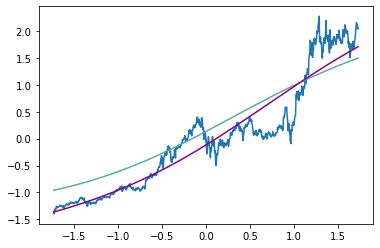

In [10]:
#Retrieved from https://towardsdatascience.com/simple-stock-price-prediction-with-ml-in-python-learners-guide-to-ml-76896910e2ba
pricePredict2 = mlpr2.predict(dates)
mpl.plot(dates, prices)
mpl.plot(dates, pricePredict, c='#5aa9ab')
mpl.plot(dates, pricePredict2, c='#8B008B')
mpl.show()

Creating Model 3: Tuning the Model Further

In [11]:
#Retrieved from https://towardsdatascience.com/simple-stock-price-prediction-with-ml-in-python-learners-guide-to-ml-76896910e2ba; modified neurons to
#50 and tolerance to .075
#Number of neurons in the input, output, and hidden layers
input3 = 1
output3 = 1
hidden3 = 50
#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden3), ('AF', 'tanh'), ('F', hidden3), ('AF', 'tanh'), ('F', hidden3), ('AF', 'tanh'), ('F', output3)]
#construct the model and dictate params
mlpr3 = ANNR([input3], layers, batchSize = 256, maxIter = 10000, tol = 0.075, reg = 1e-4, verbose = True)

In [12]:
#Retrieved from https://towardsdatascience.com/simple-stock-price-prediction-with-ml-in-python-learners-guide-to-ml-76896910e2ba
holdDays = 5
totalDays = len(dates)
mlpr3.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

Iter     1	      2.63389339 (Batch Size:   256)
Iter     2	      2.46208520 (Batch Size:   256)
Iter     3	      2.26205282 (Batch Size:   256)
Iter     4	      2.15819988 (Batch Size:   256)
Iter     5	      1.84442434 (Batch Size:   256)
Iter     6	      1.73214288 (Batch Size:   256)
Iter     7	      1.53844304 (Batch Size:   256)
Iter     8	      1.40639739 (Batch Size:   256)
Iter     9	      1.29885616 (Batch Size:   256)
Iter    10	      1.14514136 (Batch Size:   256)
Iter    11	      1.02981881 (Batch Size:   256)
Iter    12	      0.91793518 (Batch Size:   256)
Iter    13	      0.84061679 (Batch Size:   256)
Iter    14	      0.75025531 (Batch Size:   256)
Iter    15	      0.68432389 (Batch Size:   256)
Iter    16	      0.58065970 (Batch Size:   256)
Iter    17	      0.52789257 (Batch Size:   256)
Iter    18	      0.46112976 (Batch Size:   256)
Iter    19	      0.41999812 (Batch Size:   256)
Iter    20	      0.37828208 (Batch Size:   256)
Iter    21	      0.32543979 (Batch Size:

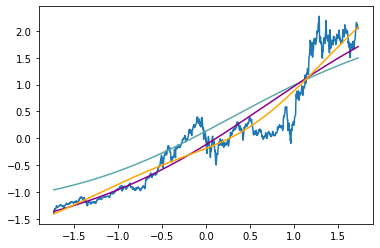

In [13]:
pricePredict3 = mlpr3.predict(dates)
mpl.plot(dates, prices)
mpl.plot(dates, pricePredict, c='#5aa9ab')
mpl.plot(dates, pricePredict2, c='#8B008B')
mpl.plot(dates, pricePredict3, c='#FFA500')
mpl.show()

In [14]:
#modified neurons to 200 and tolerance to .05, maxIter = 20000
#Number of neurons in the input, output, and hidden layers
input4 = 1
output4 = 1
hidden4 = 200
#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden4), ('AF', 'tanh'), ('F', hidden4), ('AF', 'tanh'), ('F', hidden4), ('AF', 'tanh'), ('F', output4)]
#construct the model and dictate params
mlpr4 = ANNR([input4], layers, batchSize = 256, maxIter = 20000, tol = 0.05, reg = 1e-4, verbose = True)

In [15]:
holdDays = 5
totalDays = len(dates)
mlpr4.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

Iter     1	      3.04214306 (Batch Size:   256)
Iter     2	      2.38433685 (Batch Size:   256)
Iter     3	      1.52845724 (Batch Size:   256)
Iter     4	      1.05079890 (Batch Size:   256)
Iter     5	      0.62093587 (Batch Size:   256)
Iter     6	      0.35560203 (Batch Size:   256)
Iter     7	      0.20170206 (Batch Size:   256)
Iter     8	      0.13584661 (Batch Size:   256)
Iter     9	      0.13801291 (Batch Size:   256)
Iter    10	      0.14279562 (Batch Size:   256)
Iter    11	      0.14879943 (Batch Size:   256)
Iter    12	      0.14442409 (Batch Size:   256)
Iter    13	      0.13851134 (Batch Size:   256)
Iter    14	      0.13265563 (Batch Size:   256)
Iter    15	      0.12378955 (Batch Size:   256)
Iter    16	      0.13454353 (Batch Size:   256)
Iter    17	      0.12127592 (Batch Size:   256)
Iter    18	      0.12601950 (Batch Size:   256)
Iter    19	      0.13068161 (Batch Size:   256)
Iter    20	      0.12116074 (Batch Size:   256)
Iter    21	      0.12714100 (Batch Size:

Display Final Predictions

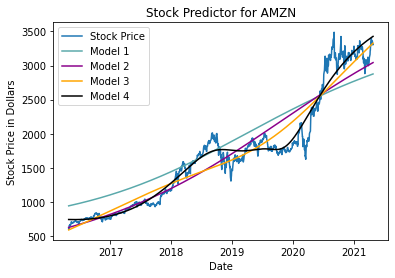

In [16]:
pricePredict3 = mlpr3.predict(dates)
pricePredict4 = mlpr4.predict(dates)
stddevdates = statistics.stdev(udates.flatten())
meandates = statistics.mean(udates.flatten())
stddevprices = statistics.stdev(uprices.flatten())
meanprices = statistics.mean(uprices.flatten())
dates_unstandardized = dates*stddevdates+meandates
dates_forchart = []
for i in dates_unstandardized.flatten():
  i = xlrd.xldate_as_datetime(i, 0)
  dates_forchart.append(i)
p1=mpl.plot(dates_forchart, prices*stddevprices+meanprices,label="Stock Price")
p2=mpl.plot(dates_forchart, pricePredict*stddevprices+meanprices, c='#5aa9ab',label="Model 1")
p3=mpl.plot(dates_forchart, pricePredict2*stddevprices+meanprices, c='#8B008B',label="Model 2")
p4=mpl.plot(dates_forchart, pricePredict3*stddevprices+meanprices, c='#FFA500',label="Model 3")
p5=mpl.plot(dates_forchart, pricePredict4*stddevprices+meanprices, c='#000000',label="Model 4")
mpl.title("Stock Predictor for "+Stock)
mpl.xlabel("Date")
mpl.ylabel("Stock Price in Dollars")
mpl.legend()
mpl.show()